# Stats, Plots + Prediction Demo

## Imports and setup

In [26]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pickle
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from NLP_Functions import *

In [1]:
# Importing the dataset (15k sample)
df = pd.read_csv('Datasets/comments_15ksample.csv', index_col = 0)
df

,Title,Platform,Userscore,Comment,Username
0,Super Smash Bros. for Wii U,WiiU,9,"This game is amazing, improves in every aspect...",Zin_49
1,Zero Escape: Zero Time Dilemma,3DS,8,A bunch of bootleg robotic versions of the mai...,Techbane
2,Metro: Last Light,PC,6,I liked the original this is some innovation b...,gstiker5
3,PlanetSide 2,PC,5,Planetside 2 has battles of epic scale and de...,NasseSeta
4,Diablo III,PC,1,Game looks good and overall i like the graphic...,JamesLFranco
...,...,...,...,...,...
14995,Halo: Reach,Xbox360,9,"Halo is far superior to it's competition, alwa...",IcyGames
14996,Uncharted 4: A Thief's End,PlayStation4,10,A Great Game even includes a Crash Bandicoot M...,Daxterman20
14997,Cuphead,XboxOne,10,Easily one of the best games of the year with ...,simsy
14998,The Elder Scrolls III: Morrowind,PC,8,This game would easily be 10 out of 10. I've p...,cimerians


## Loading the saved model and most_common words

In [3]:
# Loading the trained model on these 15k samples
classifier_f = open('Logistic_Regression_15k.pickle', 'rb')
classifier = pickle.load(classifier_f)
classifier_f.close()

# Loading the most_common
most_common_f = open('most_common_15k.pickle', 'rb')
most_common = pickle.load(most_common_f)
most_common_f.close()

## Plots

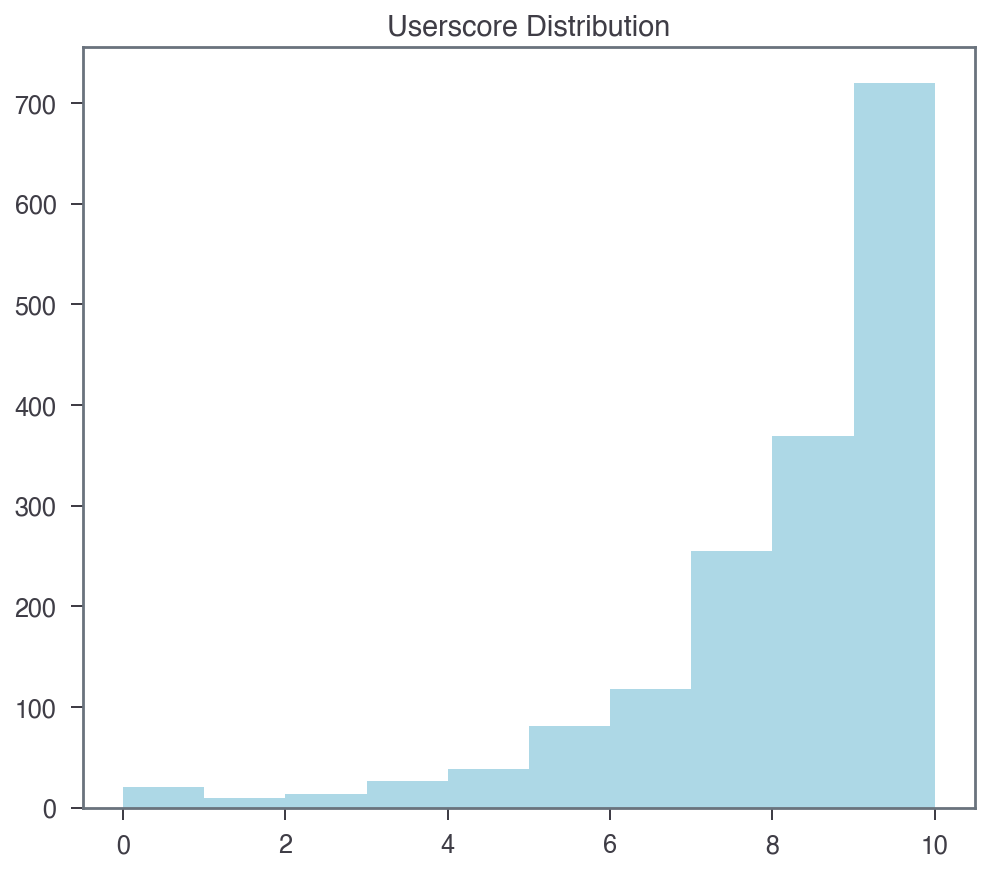

In [12]:
# Getting the avg_scores
avg_scores = df.groupby('Title', as_index = False).mean()
avg_scores['Userscore'] = avg_scores['Userscore'].apply(lambda x: round(x, 2))

avg_scores.hist(color = 'lightblue', grid = False)
plt.title('Userscore Distribution');

## Predictions Function Demo

In [94]:
# Function to make the prediction look fancier :D
def predictor(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    
    prediction = find_features(text, most_common)
    
    print('Sentence/Review:', text, '\n')
    
    print('Based on the input you gave me, I classify the sentiment scores as:', 
          '\n - Negative:', scores['neg'], '\n - Neutral:', scores['neu'], '\n - Positive:', scores['pos'])
    
    print('\nAfter all my intensive training, I evaluate this input as:')#, classifier.classify(prediction))
    
    if (scores['neg'] > scores['pos']) and (classifier.classify(prediction) == 'Positive'):
        return 'Negative'
    else:
        return classifier.classify(prediction)
        
    
    #return classifier.classify(prediction)

predictor('I think Ironhack is a good company. They have taught us many things in such a small amount of time.\
 However, I think they should increase the time spent teaching ML/Deep Learning.')

Sentence/Review: I think Ironhack is a good company. They have taught us many things in such a small amount of time. However, I think they should increase the time spent teaching ML/Deep Learning. 

Based on the input you gave me, I classify the sentiment scores as: 
 - Negative: 0.0 
 - Neutral: 0.833 
 - Positive: 0.167

After all my intensive training, I evaluate this input as:


'Positive'